#### Given a person's attributes; predict whether he/she has a heart disease or not.


1. ID (unique identifier) [REAL]

2. age [REAL]

3. sex 0 = male, 1 = female [BINARY]

4. chest pain type (4 values) [REAL]

5. resting blood pressure [REAL]

6. serum cholestoral in mg/dl [REAL]

7. fasting blood sugar > 120 mg/dl [BINARY]

8. resting electrocardiographic results (values 0,1,2) [NOMINAL]

9. maximum heart rate achieved [REAL]

10. exercise induced angina [BINARY]

11. oldpeak = ST depression induced by exercise relative to rest [REAL]

12. the slope of the peak exercise ST segment [NOMINAL]

13. number of major vessels (0-3) colored by flourosopy [NOMINAL]

14. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect [NOMINAL]

15. class: 0 = absence of heart disease, 1 = presence of heart disease [BINARY CLASS]

In [2]:
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#feature splitting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


#Basic Filter Methods
from sklearn.feature_selection import VarianceThreshold

#metric scores
from sklearn.metrics import roc_auc_score,balanced_accuracy_score, roc_curve, make_scorer, classification_report,confusion_matrix, accuracy_score, f1_score, cohen_kappa_score, matthews_corrcoef, log_loss, auc
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.datasets import make_classification

#ML algorithm models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

#NEW ML MODELS
from sklearn.neural_network import MLPClassifier 

#feature selection algorithms
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

#wrapper selection algorithms
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Imbalanced datasets
from imblearn.over_sampling import SMOTE

#hyperparameter tuning
from KUtils.classifier import generic_classifier_utils as gcu
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

#Ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#Boosting
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
missing_values = ["n/a", "na", "--", "?", " ", " ?"]
med = pd.read_csv('disease.csv', na_values = missing_values)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
med.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [5]:
med['class'].value_counts()

0    9145
1    7142
Name: class, dtype: int64

In [6]:
med.drop_duplicates(inplace=True)

In [7]:
med.shape

(16287, 15)

# Checking for null values

<AxesSubplot:>

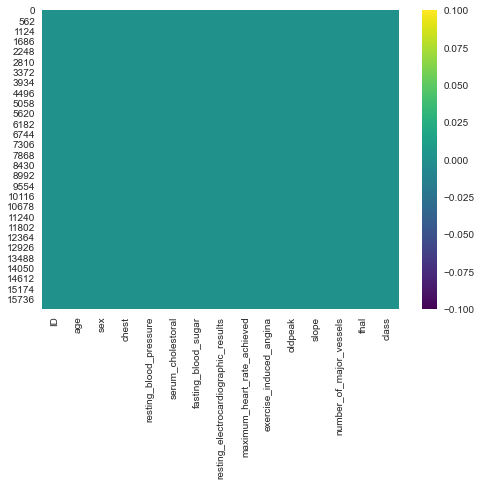

In [8]:
sns.heatmap(med.isnull(), cmap='viridis')

In [53]:
med.isnull().sum().sum()

0

In [9]:
#Creating a copy of the dataset
med_org = med.copy() 

# Correlation heatmap

##### Due to the curse of dimensionality, less features usually mean high improvement in term of speed.

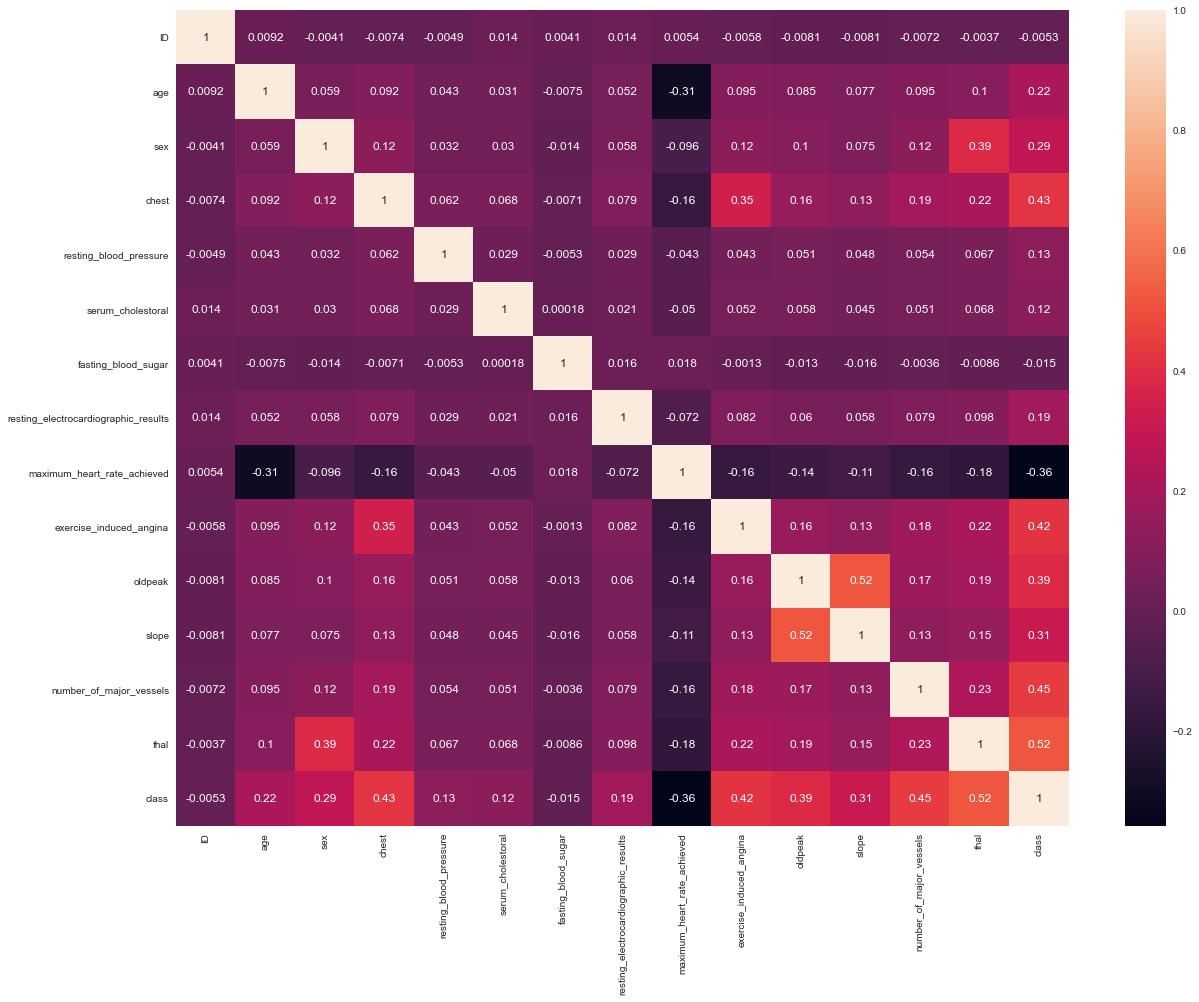

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(med.corr(), annot=True)
plt.show()

# Data Visualizations

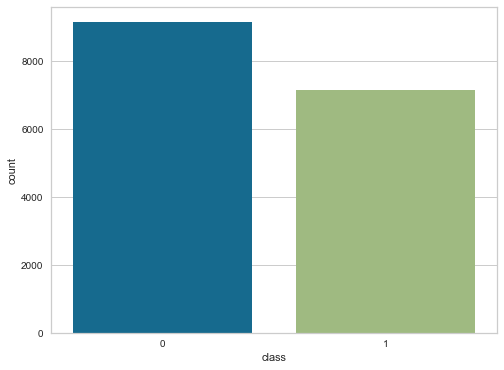

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="class", data=med)
plt.show()

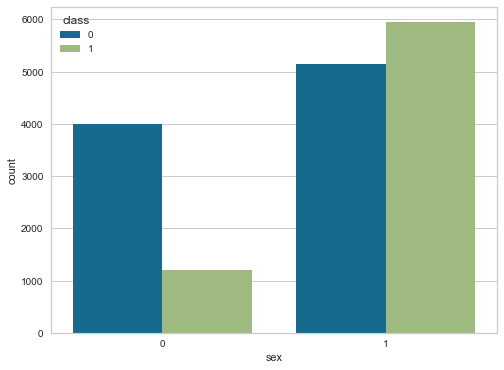

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="class", data=med)
plt.show()

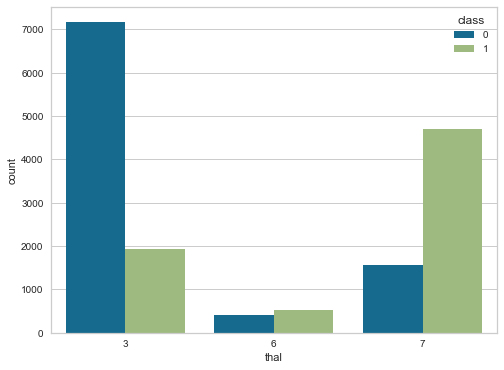

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="thal", hue="class", data=med)
plt.show()

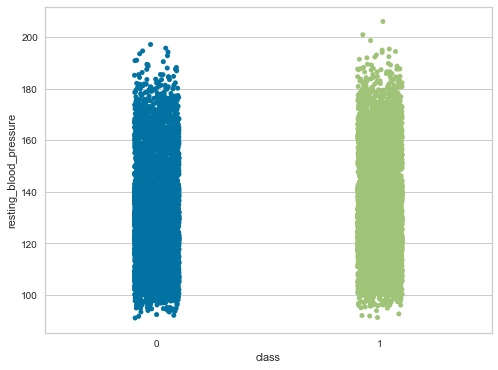

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="class", y="resting_blood_pressure", data=med)
plt.show()

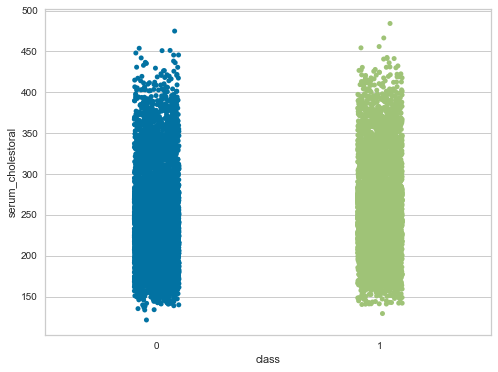

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="class", y="serum_cholestoral", data=med)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


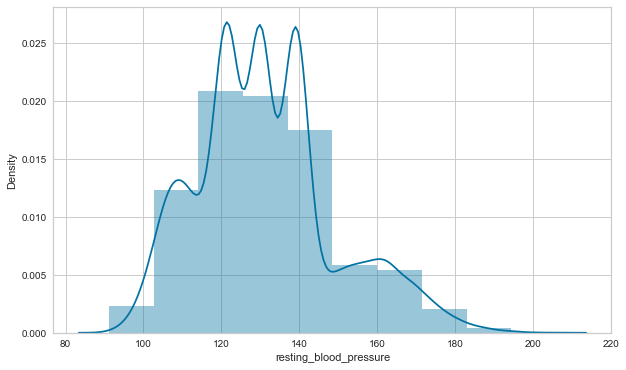

In [16]:
f, ax = plt.subplots(figsize=(10,6))
x = med['resting_blood_pressure']
ax = sns.distplot(x, bins=10)
plt.show()

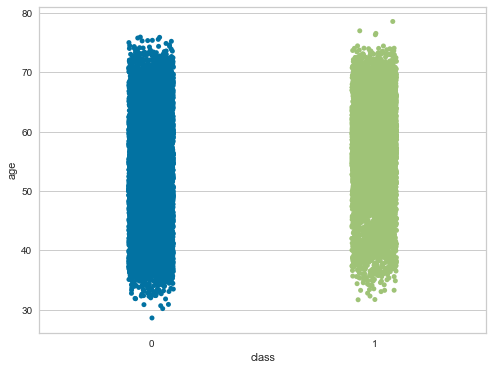

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="class", y="age", data=med)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


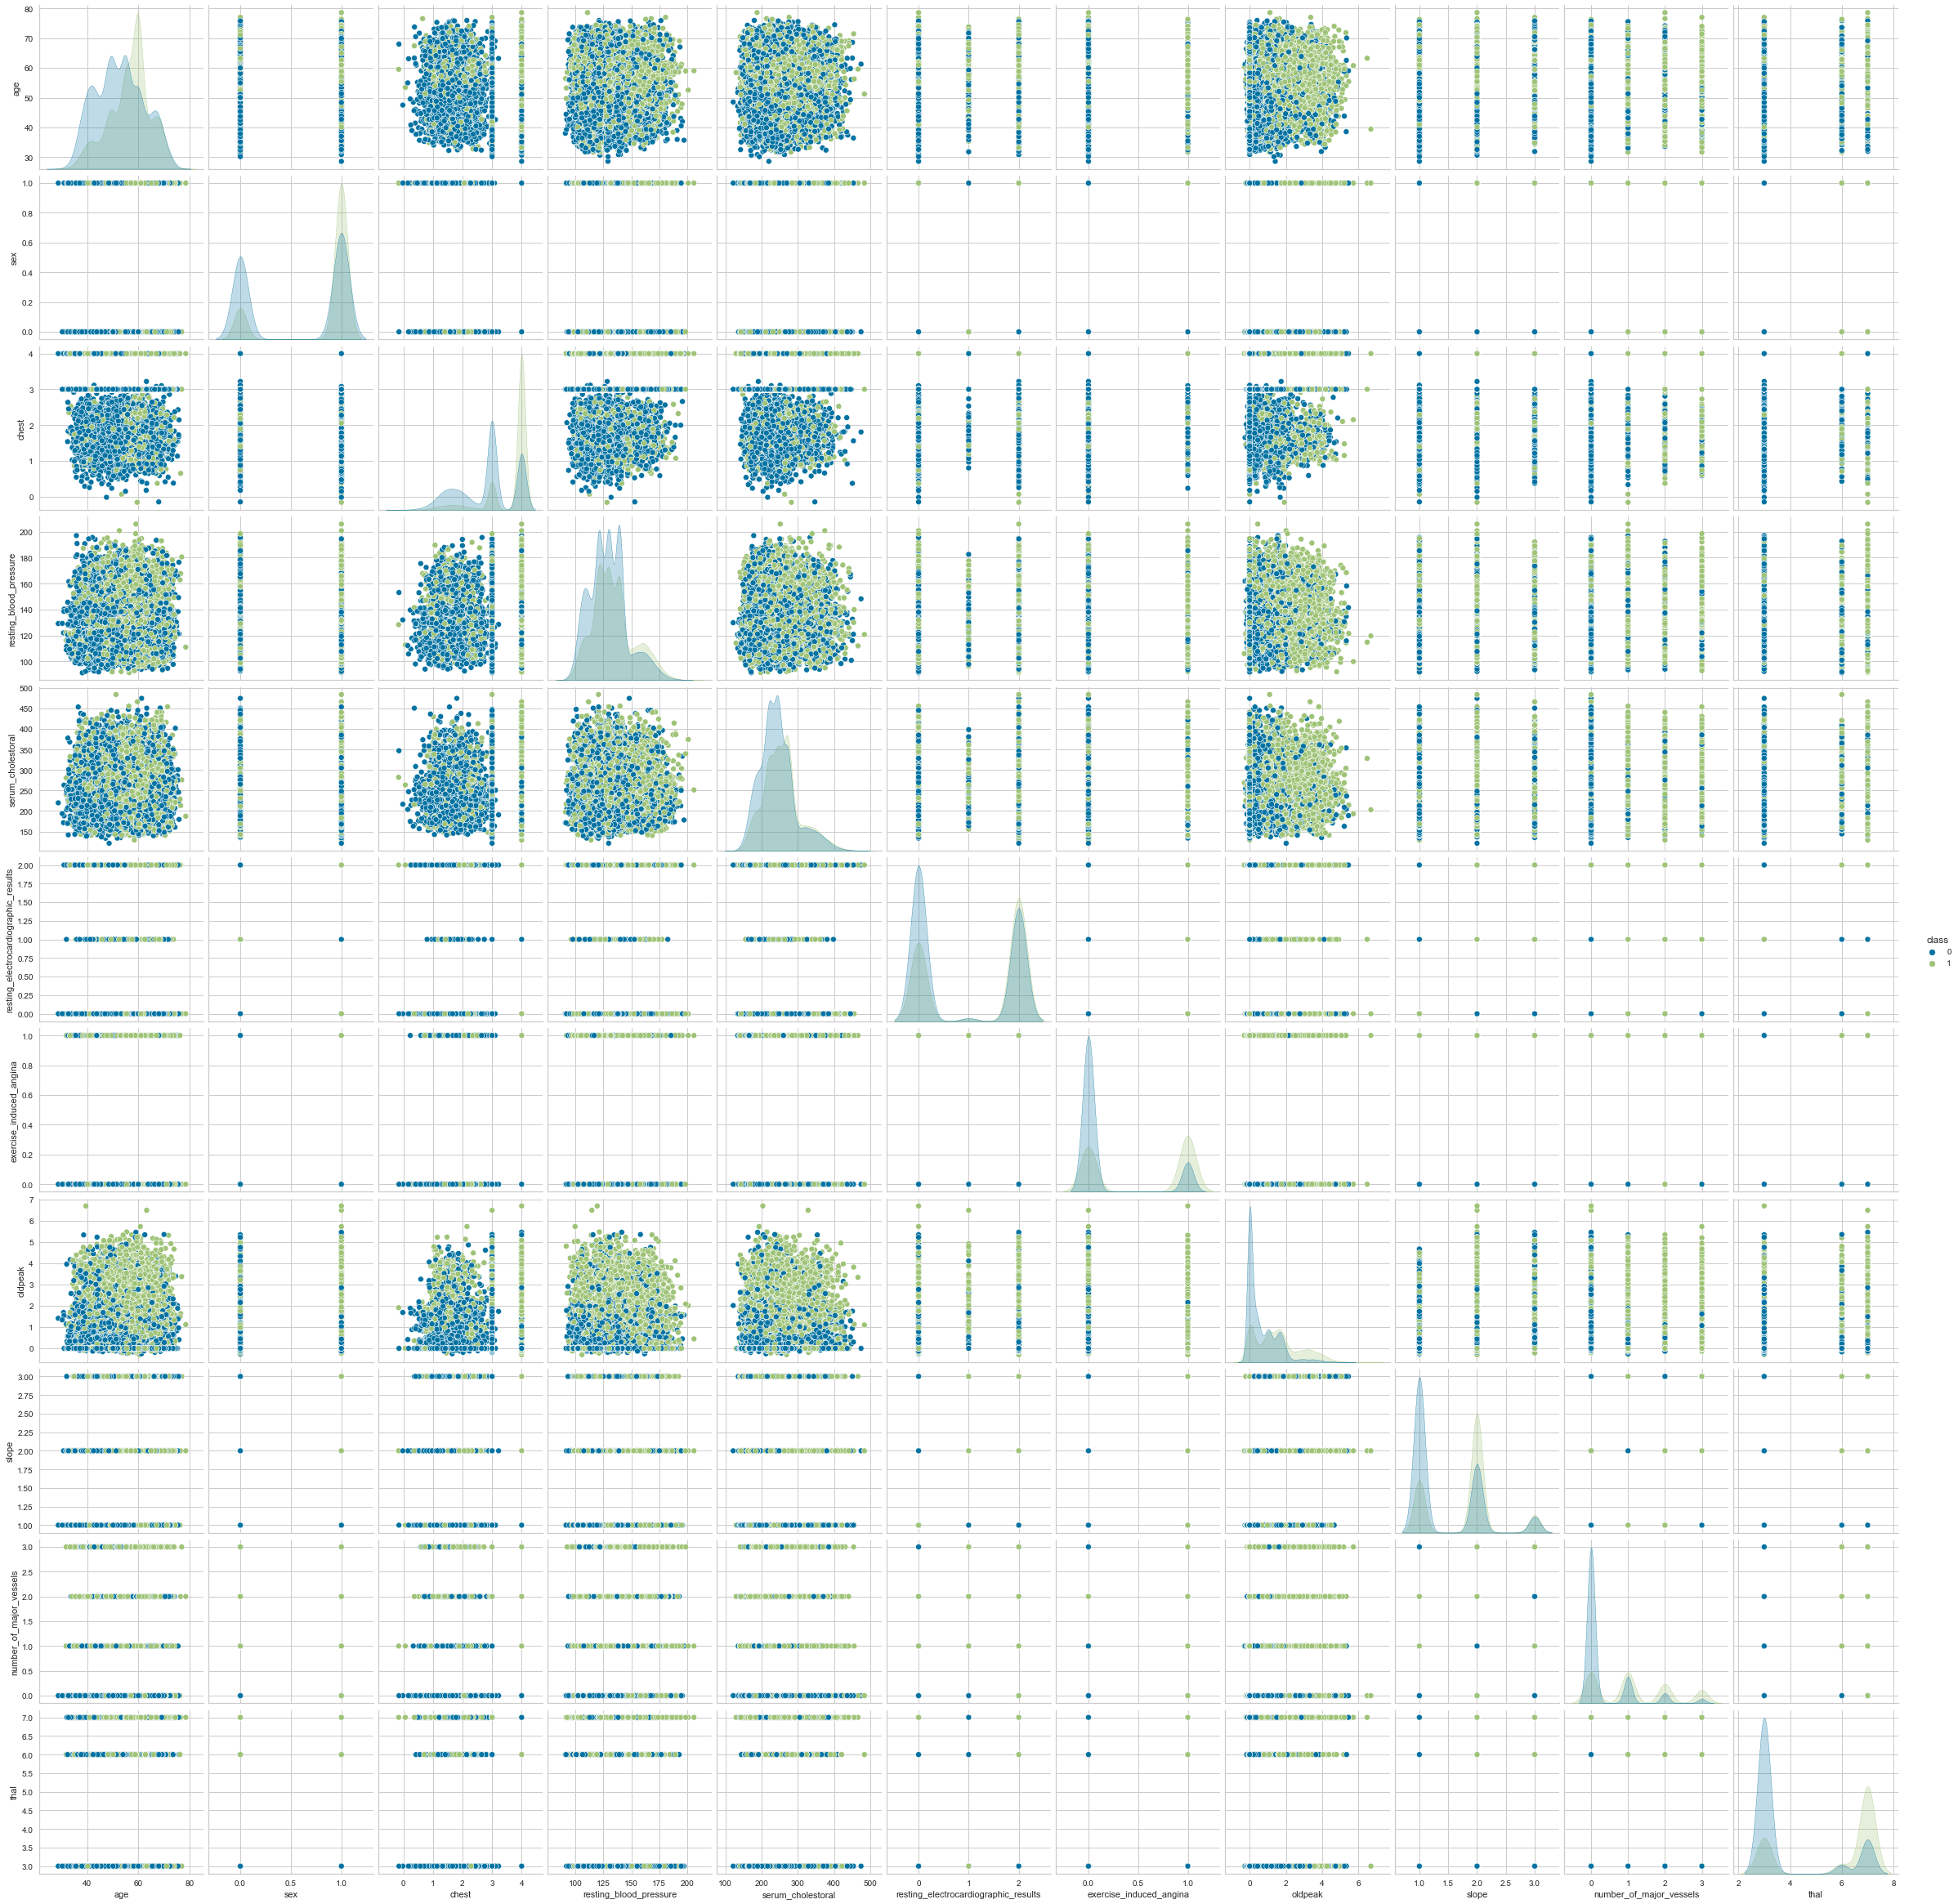

In [49]:
sns.set_style("whitegrid");
sns.pairplot(med, hue="class", size=3);
plt.show()

In [18]:
#Dropping columns which show negligible correlation
med.drop(['ID', 'maximum_heart_rate_achieved','fasting_blood_sugar'],axis=1,inplace=True)

# Avoiding data peeking

In [19]:
# separate dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(med.drop(labels=['class'], axis=1),med['class'],test_size=0.35,random_state=0)


#Creating copies
X_train_org=X_train.copy()
X_test_org=X_test.copy()

# Zero Variance Features

In [20]:
varModel=VarianceThreshold(threshold=0)

varModel.fit(X_train)
constArr=varModel.get_support()
constArr
collections.Counter(constArr)
#NO ZERO-VARIANCE FEATURES

Counter({True: 11})

# Quasi-Constant Features

##### Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. Mostly we do not consider these features in prediting the result.

In [21]:
#Create variance threshold model
quasiModel=VarianceThreshold(threshold=0.01) #It will search for the features having 99% of same value in all samples.
quasiModel.fit(X_train)
quasiArr=quasiModel.get_support()
quasiArr
collections.Counter(quasiArr)
quasiCols=[col for col in X_train.columns if col not in X_train.columns[quasiArr]]
quasiCols

[]

In [22]:
train_features = quasiModel.transform(X_train)
test_features = quasiModel.transform(X_test)

train_features.shape, test_features.shape

((10586, 11), (5701, 11))

In [23]:
print('Shape before drop-->',X_train.shape, X_test.shape)
X_train.drop(columns=quasiCols,axis=1,inplace=True)
X_test.drop(columns=quasiCols,axis=1,inplace=True)
print('Shape after drop-->',X_train.shape, X_test.shape)

Shape before drop--> (10586, 11) (5701, 11)
Shape after drop--> (10586, 11) (5701, 11)


In [24]:
#The method will find the duplicate columns and return name of duplicated columns in an array
def duplicateColumns(med):
    dupliCols=[]
    for i in range(0,len(med.columns)):
        col1=med.columns[i]
        for col2 in med.columns[i+1:]:
            if med[col1].equals(med[col2]):
                dupliCols.append(col1+','+col2)
    return dupliCols

duplCols=duplicateColumns(X_test)
duplCols
print('Total Duplicated columns',len(duplCols))
dCols=[col.split(',')[1] for col in duplCols]
dCols
#NO DUPLICATE COLUMNS

Total Duplicated columns 0


[]

In [25]:
correlated_features = set()
correlation_matrix = med.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

set()


In [26]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names

col=correlation(X_train,0.75)
print('Correlated columns:',col)

Correlated columns: set()


In [27]:
print('Shape of our data before applying filter technique-->',med.shape)
print('Shape before droping duplicate columns-->',X_train.shape, X_test.shape)
X_train=X_train.drop(columns=col,axis=1)
X_test=X_test.drop(columns=col,axis=1)
print('Shape after droping duplicate columns-->',X_train.shape, X_test.shape)

Shape of our data before applying filter technique--> (16287, 12)
Shape before droping duplicate columns--> (10586, 11) (5701, 11)
Shape after droping duplicate columns--> (10586, 11) (5701, 11)


# Feature Scaling

In [28]:
scaler = MinMaxScaler()
stand = StandardScaler()

stand = stand.fit(X_train)

X_train = stand.fit_transform(X_train)
X_test = stand.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train_org.columns)

X_test = pd.DataFrame(X_test, columns=X_test_org.columns)


In [29]:
X_train.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,resting_electrocardiographic_results,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,0.449994,0.691582,0.865418,-0.549662,-0.655725,0.992603,1.416220,0.505055,-0.939071,0.342077,-0.875808
1,-0.865040,0.691582,0.865418,-0.819491,-0.007915,0.992603,-0.706105,1.703610,0.650219,0.342077,-0.875808
2,1.942066,0.691582,0.865418,-0.120443,-1.748935,0.992603,1.416220,-0.545199,-0.939071,0.342077,-0.875808
3,0.221825,0.691582,0.865418,0.448042,-0.096937,-1.019980,1.416220,-0.915563,-0.939071,0.342077,1.192410
4,-1.173277,-1.445961,-1.717584,-1.349416,0.755466,0.992603,-0.706105,-0.915563,-0.939071,-0.711831,-0.875808


In [30]:
Y_train.unique()

array([1, 0], dtype=int64)

In [31]:
Y_train.value_counts()

0    5966
1    4620
Name: class, dtype: int64

In [32]:
i_scores = mutual_info_classif(X_train.values, Y_train.values)

IG_DF = pd.DataFrame(i_scores,index = X_train.columns, columns =['I-Gain'])
IG_DF.sort_values(by=['I-Gain'],ascending=False,inplace=True)
IG_DF.head()

,I-Gain
thal,0.140793
chest,0.130563
number_of_major_vessels,0.121975
exercise_induced_angina,0.089671
oldpeak,0.079245


# Mutual information

#### It is a measure of the mutual dependence of two variables. Entropy signifies the amount of information within a variable.

In [33]:
# create the SelectKBest with the mutual info strategy.

fit_ig = SelectKBest(mutual_info_classif).fit(X_train, Y_train)

dfscores = pd.DataFrame(fit_ig.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_IG'] 
#print 10 best features
print(featureScores.nlargest(15,'Score_IG')) 

# display the retained features.
features = X_train.columns[fit_ig.get_support()]

x_train_ig = fit_ig.transform(X_train)
x_test_ig = fit_ig.transform(X_test)

                        Selected_columns  Score_IG
10                                  thal  0.133114
2                                  chest  0.128072
9                number_of_major_vessels  0.120737
6                exercise_induced_angina  0.085534
7                                oldpeak  0.081552
8                                  slope  0.070531
1                                    sex  0.048816
0                                    age  0.039435
3                 resting_blood_pressure  0.016836
5   resting_electrocardiographic_results  0.013129
4                      serum_cholestoral  0.011805


# Chi-squared Score

#### It compares the observed distribution between various features in the dataset and the target variable.

In [34]:
scale = MinMaxScaler()
scale = scale.fit(X_train)
X_trainM = scale.fit_transform(X_train)
X_testM = scale.fit_transform(X_test)

X_trainM = pd.DataFrame(X_trainM, columns=X_train_org.columns)

X_testM = pd.DataFrame(X_testM, columns=X_test_org.columns)

# # apply the chi2 score on the data and target (target should be binary). 

fit = SelectKBest(chi2).fit(X_trainM, Y_train)

dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X_trainM.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_chi2'] 
#print 10 best features
print(featureScores.nlargest(20,'Score_chi2')) 

# display the k selected features.
features = X_trainM.columns[fit.get_support()]
print(features)

                        Selected_columns   Score_chi2
10                                  thal  1557.913948
6                exercise_induced_angina  1219.716687
9                number_of_major_vessels   960.898466
8                                  slope   341.557203
1                                    sex   296.585399
7                                oldpeak   224.640937
5   resting_electrocardiographic_results   179.789666
2                                  chest   121.942761
0                                    age    30.794579
3                 resting_blood_pressure    11.801417
4                      serum_cholestoral     9.248703
Index(['age', 'sex', 'chest', 'resting_blood_pressure',
       'resting_electrocardiographic_results', 'exercise_induced_angina',
       'oldpeak', 'slope', 'number_of_major_vessels', 'thal'],
      dtype='object')


# ANalysis Of VAriance Test

#### ANOVA assumes a linear relationship between the variables and the target, and also that the variables are normally distributed.

In [35]:

# create the SelectKBest with the Annova test
fit = SelectKBest(f_classif).fit(X_train, Y_train)

dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_ANOVA'] 
#print 10 best features
print(featureScores.nlargest(15,'Score_ANOVA')) 

# display the retained features.
features = X_train.columns[fit.get_support()]

featureScores.sort_values(by=['Score_ANOVA'],ascending=False,inplace=True)

                        Selected_columns  Score_ANOVA
10                                  thal  3846.890137
9                number_of_major_vessels  2717.320327
2                                  chest  2324.844391
6                exercise_induced_angina  2208.907529
7                                oldpeak  1836.978094
8                                  slope  1127.956996
1                                    sex  1003.402765
0                                    age   508.364785
5   resting_electrocardiographic_results   382.331169
3                 resting_blood_pressure   171.144522
4                      serum_cholestoral   165.001570


# ROC-AUC scores

###### Build a decision tree using a single variable and target. Rank features according to the model RMSE or ROC-AUC Select the features with higher ranking scores.

In [36]:
# list of the resulting scores.
roc_values = []

# loop over all features and calculate the score.
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[[feature]], Y_train)
    y_scored = clf.predict(X_test[[feature]])
    
    roc_values.append(roc_auc_score(Y_test, y_scored))

# create a Pandas Series for visualisation.
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns

# show the results.
print(roc_values.sort_values(ascending=False))

thal                                    0.759293
number_of_major_vessels                 0.726787
chest                                   0.725404
exercise_induced_angina                 0.698712
slope                                   0.682973
sex                                     0.628742
resting_electrocardiographic_results    0.593873
age                                     0.548395
serum_cholestoral                       0.525981
resting_blood_pressure                  0.514687
oldpeak                                 0.495863
dtype: float64


# MACHINE LEARNING MODELS

In [37]:
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Heart Disease prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.7, y = 0.02, s = ('AUC Score:',round(roc_auc_score(Y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

# KNN

F1 SCORE: KNN 0.8431332655137335
Cohen Kappa: KNN 0.7244240060092326
CR Report: KNN 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      3179
           1       0.87      0.82      0.84      2522

    accuracy                           0.86      5701
   macro avg       0.86      0.86      0.86      5701
weighted avg       0.86      0.86      0.86      5701

Confusion Matrix: KNN 
 [[2858  321]
 [ 450 2072]]
MCC: KNN 0.7251952812856175
Accuracy: KNN 0.8647605683213472
Balanced Accuracy: KNN 0.8602975164884343


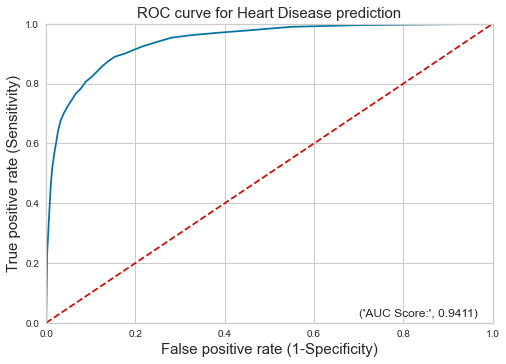

In [38]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

print("F1 SCORE: KNN",f1_score(Y_test, y_pred_knn))
print("Cohen Kappa: KNN",cohen_kappa_score(Y_test, y_pred_knn))
print("CR Report: KNN \n",classification_report(Y_test, y_pred_knn))
print("Confusion Matrix: KNN \n",confusion_matrix(Y_test, y_pred_knn))
print("MCC: KNN",matthews_corrcoef(Y_test, y_pred_knn))
print("Accuracy: KNN",accuracy_score(Y_test, y_pred_knn))
print("Balanced Accuracy: KNN",balanced_accuracy_score(Y_test, y_pred_knn))
plot_roc(knn)

# NAIVE BAYES

F1 SCORE: NAIVE BAYES 0.8339250493096647
Cohen Kappa: NAIVE BAYES 0.700955983064496
CR Report: NAIVE BAYES 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      3179
           1       0.83      0.84      0.83      2522

    accuracy                           0.85      5701
   macro avg       0.85      0.85      0.85      5701
weighted avg       0.85      0.85      0.85      5701

Confusion Matrix: NAIVE BAYES 
 [[2745  434]
 [ 408 2114]]
MCC: NAIVE BAYES 0.7009858699923326
Accuracy: NAIVE BAYES 0.8523066128749343
Balanced Accuracy: NAIVE BAYES 0.850851356755113


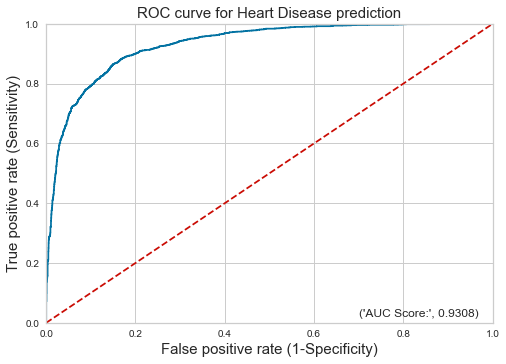

In [39]:
model_naive = GaussianNB()
model_naive.fit(X_train, Y_train)
y_pred_naive = model_naive.predict(X_test)

print("F1 SCORE: NAIVE BAYES",f1_score(Y_test, y_pred_naive))
print("Cohen Kappa: NAIVE BAYES",cohen_kappa_score(Y_test, y_pred_naive))
print("CR Report: NAIVE BAYES \n",classification_report(Y_test, y_pred_naive))
print("Confusion Matrix: NAIVE BAYES \n",confusion_matrix(Y_test, y_pred_naive))
print("MCC: NAIVE BAYES",matthews_corrcoef(Y_test, y_pred_naive))
print("Accuracy: NAIVE BAYES",accuracy_score(Y_test, y_pred_naive))
print("Balanced Accuracy: NAIVE BAYES",balanced_accuracy_score(Y_test, y_pred_naive))
plot_roc(model_naive)

# DECISION TREE

F1 SCORE: DECISION TREE 0.841426556518235
Cohen Kappa: DECISION TREE 0.7192602470119028
CR Report: DECISION TREE 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      3179
           1       0.86      0.83      0.84      2522

    accuracy                           0.86      5701
   macro avg       0.86      0.86      0.86      5701
weighted avg       0.86      0.86      0.86      5701

Confusion Matrix: DECISION TREE 
 [[2826  353]
 [ 434 2088]]
MCC: DECISION TREE 0.7195606861495718
Accuracy: DECISION TREE 0.8619540431503245
Balanced Accuracy: DECISION TREE 0.8584365728802642


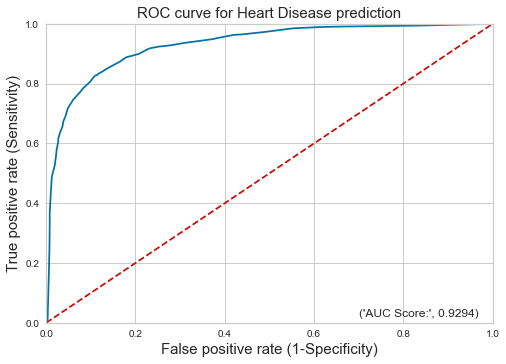

In [40]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=0)
dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

print("F1 SCORE: DECISION TREE",f1_score(Y_test, y_pred_dtc))
print("Cohen Kappa: DECISION TREE",cohen_kappa_score(Y_test, y_pred_dtc))
print("CR Report: DECISION TREE \n",classification_report(Y_test, y_pred_dtc))
print("Confusion Matrix: DECISION TREE \n",confusion_matrix(Y_test, y_pred_dtc))
print("MCC: DECISION TREE",matthews_corrcoef(Y_test, y_pred_dtc))
print("Accuracy: DECISION TREE",accuracy_score(Y_test, y_pred_dtc))
print("Balanced Accuracy: DECISION TREE",balanced_accuracy_score(Y_test, y_pred_dtc))
plot_roc(dtc)

# LOGISTIC REGRESSION

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


F1 SCORE: LOGISTIC REGRESSION 0.8458434221146085
Cohen Kappa: LOGISTIC REGRESSION 0.7273863902370024
CR Report: LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      3179
           1       0.86      0.83      0.85      2522

    accuracy                           0.87      5701
   macro avg       0.87      0.86      0.86      5701
weighted avg       0.87      0.87      0.87      5701

Confusion Matrix: LOGISTIC REGRESSION 
 [[2841  338]
 [ 426 2096]]
MCC: LOGISTIC REGRESSION 0.7277452544678058
Accuracy: LOGISTIC REGRESSION 0.8659884230836695
Balanced Accuracy: LOGISTIC REGRESSIONE 0.8623818481664591


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


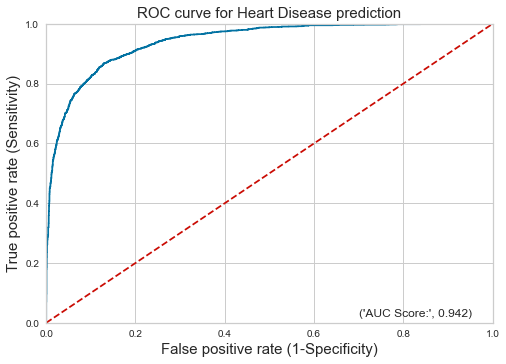

In [58]:
log_model = LogisticRegression(random_state=0, n_jobs=-1, verbose=1)
log_model.fit(X_train, Y_train)
y_pred_log = log_model.predict(X_test)

print("F1 SCORE: LOGISTIC REGRESSION",f1_score(Y_test, y_pred_log))
print("Cohen Kappa: LOGISTIC REGRESSION",cohen_kappa_score(Y_test, y_pred_log))
print("CR Report: LOGISTIC REGRESSION \n",classification_report(Y_test, y_pred_log))
print("Confusion Matrix: LOGISTIC REGRESSION \n",confusion_matrix(Y_test, y_pred_log))
print("MCC: LOGISTIC REGRESSION",matthews_corrcoef(Y_test, y_pred_log))
print("Accuracy: LOGISTIC REGRESSION",accuracy_score(Y_test, y_pred_log))
print("Balanced Accuracy: LOGISTIC REGRESSIONE",balanced_accuracy_score(Y_test, y_pred_log))
plot_roc(log_model)

# SUPPORT VECTOR MACHINE

In [41]:
svm1 = svm.SVC(kernel='linear', C=1)
svm1.fit(X_train, Y_train)
y_pred_svm = svm1.predict(X_test)

print("F1 SCORE: SUPPORT VECTOR MACHINE",f1_score(Y_test, y_pred_svm))
print("Cohen Kappa: SUPPORT VECTOR MACHINE",cohen_kappa_score(Y_test, y_pred_svm))
print("CR Report: SUPPORT VECTOR MACHINE \n",classification_report(Y_test, y_pred_svm))
print("Confusion Matrix: SUPPORT VECTOR MACHINE \n",confusion_matrix(Y_test, y_pred_svm))
print("MCC: SUPPORT VECTOR MACHINE",matthews_corrcoef(Y_test, y_pred_svm))
print("Accuracy: SUPPORT VECTOR MACHINE",accuracy_score(Y_test, y_pred_svm))
print("Balanced Accuracy: SUPPORT VECTOR MACHINE",balanced_accuracy_score(Y_test, y_pred_svm))

F1 SCORE: SUPPORT VECTOR MACHINE 0.8468067906224738
Cohen Kappa: SUPPORT VECTOR MACHINE 0.729438327692977
CR Report: SUPPORT VECTOR MACHINE 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      3179
           1       0.86      0.83      0.85      2522

    accuracy                           0.87      5701
   macro avg       0.87      0.86      0.86      5701
weighted avg       0.87      0.87      0.87      5701

Confusion Matrix: SUPPORT VECTOR MACHINE 
 [[2848  331]
 [ 427 2095]]
MCC: SUPPORT VECTOR MACHINE 0.7298669530403651
Accuracy: SUPPORT VECTOR MACHINE 0.8670408700228031
Balanced Accuracy: SUPPORT VECTOR MACHINE 0.8632845679629827


# RANDOM FOREST CLASSIFIER

F1 SCORE: RANDOM FOREST CLASSIFIER 0.8627609973646868
Cohen Kappa: RANDOM FOREST CLASSIFIER 0.7582013950802624
CR Report: RANDOM FOREST CLASSIFIER 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      3179
           1       0.88      0.84      0.86      2522

    accuracy                           0.88      5701
   macro avg       0.88      0.88      0.88      5701
weighted avg       0.88      0.88      0.88      5701

Confusion Matrix: RANDOM FOREST CLASSIFIER 
 [[2896  283]
 [ 394 2128]]
MCC: RANDOM FOREST CLASSIFIER 0.7587979399260958
Accuracy: RANDOM FOREST CLASSIFIER 0.8812489037011051
Balanced Accuracy: RANDOM FOREST CLASSIFIER 0.8773765384902259


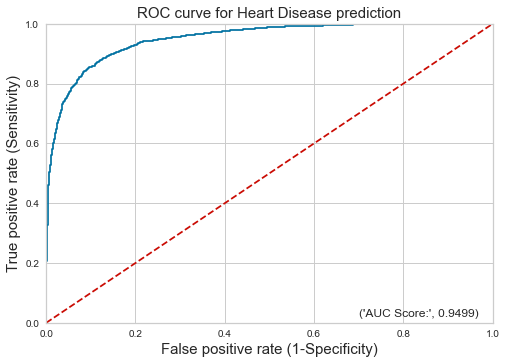

In [42]:
rfc = RandomForestClassifier(criterion="gini",max_depth = 9, random_state=0)
rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

print("F1 SCORE: RANDOM FOREST CLASSIFIER",f1_score(Y_test, y_pred_rfc))
print("Cohen Kappa: RANDOM FOREST CLASSIFIER",cohen_kappa_score(Y_test, y_pred_rfc))
print("CR Report: RANDOM FOREST CLASSIFIER \n",classification_report(Y_test, y_pred_rfc))
print("Confusion Matrix: RANDOM FOREST CLASSIFIER \n",confusion_matrix(Y_test, y_pred_rfc))
print("MCC: RANDOM FOREST CLASSIFIER",matthews_corrcoef(Y_test, y_pred_rfc))
print("Accuracy: RANDOM FOREST CLASSIFIER",accuracy_score(Y_test, y_pred_rfc))
print("Balanced Accuracy: RANDOM FOREST CLASSIFIER",balanced_accuracy_score(Y_test, y_pred_rfc))
plot_roc(rfc)

# NEURAL NETWORK

F1 SCORE: NEURAL NETWORK 0.8574884095948396
Cohen Kappa: NEURAL NETWORK 0.7477772225818654
CR Report: NEURAL NETWORK 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      3179
           1       0.87      0.84      0.86      2522

    accuracy                           0.88      5701
   macro avg       0.88      0.87      0.87      5701
weighted avg       0.88      0.88      0.88      5701

Confusion Matrix: NEURAL NETWORK 
 [[2867  312]
 [ 395 2127]]
MCC: NEURAL NETWORK 0.7481052528346183
Accuracy: NEURAL NETWORK 0.8759866690054376
Balanced Accuracy: NEURAL NETWORK 0.8726171003754566


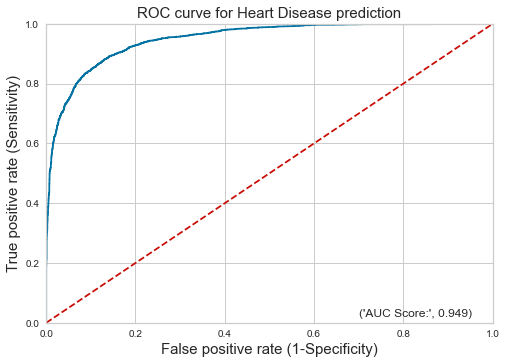

In [43]:
mlp = MLPClassifier(alpha=1, hidden_layer_sizes=[150], max_iter=1000, random_state=0)
mlp.fit(X_train, Y_train)
y_pred_mlp = mlp.predict(X_test)

print("F1 SCORE: NEURAL NETWORK",f1_score(Y_test, y_pred_mlp))
print("Cohen Kappa: NEURAL NETWORK",cohen_kappa_score(Y_test, y_pred_mlp))
print("CR Report: NEURAL NETWORK \n",classification_report(Y_test, y_pred_mlp))
print("Confusion Matrix: NEURAL NETWORK \n",confusion_matrix(Y_test, y_pred_mlp))
print("MCC: NEURAL NETWORK",matthews_corrcoef(Y_test, y_pred_mlp))
print("Accuracy: NEURAL NETWORK",accuracy_score(Y_test, y_pred_mlp))
print("Balanced Accuracy: NEURAL NETWORK",balanced_accuracy_score(Y_test, y_pred_mlp))
plot_roc(mlp)

# BAGGING

In [50]:
#RFC BAGGING
tree_bag = BaggingClassifier(rfc, random_state=0)

n_estimators = list(range(2,50,2))
max_samples = list(np.arange(0.0, 1.2, 0.1))
max_features = list(np.arange(0.0, 1.2, 0.1))
param_grid = dict(max_features=max_features, n_estimators=n_estimators, max_samples=max_samples)

bag_dtc = RandomizedSearchCV(tree_bag , param_grid , cv = 10 , random_state=0, n_jobs = -1, n_iter=10, verbose=1, scoring='f1')

bag_dtc.fit(X_train, Y_train)

y_pred_bag_dtc = bag_dtc.predict(X_test)
print(bag_dtc.best_score_, bag_dtc.best_params_)

print("F1 SCORE: DTC",f1_score(Y_test, y_pred_bag_dtc))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_pred_bag_dtc))
print("CR Report: DTC \n",classification_report(Y_test, y_pred_bag_dtc))
print("MCC: DTC",matthews_corrcoef(Y_test, y_pred_bag_dtc))
print("Accuracy: DTC",accuracy_score(Y_test, y_pred_bag_dtc))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_pred_bag_dtc))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_pred_bag_dtc))
print("CF: DTC \n",confusion_matrix(Y_test, y_pred_bag_dtc))

bag_dtc_res = pd.DataFrame(bag_dtc.cv_results_)
bag_dtc_res[['params','mean_test_score','std_test_score','rank_test_score']]


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


0.8638678387035391 {'n_estimators': 42, 'max_samples': 0.5, 'max_features': 0.9}
F1 SCORE: DTC 0.8637009953280521
Cohen Kappa: DTC 0.7602456826628813
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      3179
           1       0.89      0.84      0.86      2522

    accuracy                           0.88      5701
   macro avg       0.88      0.88      0.88      5701
weighted avg       0.88      0.88      0.88      5701

MCC: DTC 0.7609572105129073
Accuracy: DTC 0.8823013506402385
BAC: DTC 0.8782382850980575
ROC-AUC: DTC 0.8782382850980576
CF: DTC 
 [[2904  275]
 [ 396 2126]]


,params,mean_test_score,std_test_score,rank_test_score
0,"{'n_estimators': 42, 'max_samples': 0.5, 'max_...",0.863868,0.010786,1
1,"{'n_estimators': 32, 'max_samples': 0.0, 'max_...",NaN,NaN,6
2,"{'n_estimators': 44, 'max_samples': 0.8, 'max_...",0.863250,0.012362,2
3,"{'n_estimators': 2, 'max_samples': 0.4, 'max_f...",NaN,NaN,7
4,"{'n_estimators': 40, 'max_samples': 1.0, 'max_...",0.821696,0.014680,3
5,"{'n_estimators': 40, 'max_samples': 0.70000000...",0.820889,0.013605,4
6,"{'n_estimators': 8, 'max_samples': 0.0, 'max_f...",NaN,NaN,8
7,"{'n_estimators': 48, 'max_samples': 1.0, 'max_...",NaN,NaN,9
8,"{'n_estimators': 4, 'max_samples': 0.700000000...",0.801018,0.015714,5
9,"{'n_estimators': 28, 'max_samples': 1.1, 'max_...",NaN,NaN,10


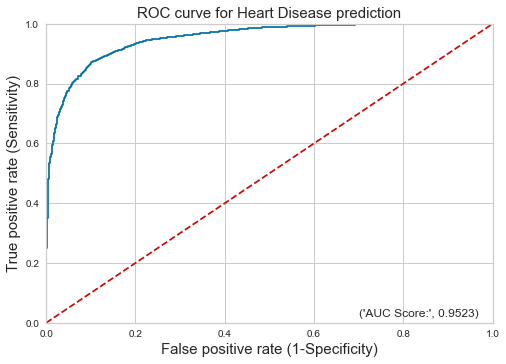

In [51]:
plot_roc(bag_dtc)

# XG BOOST

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 SCORE: XG BOOST 0.8344396720031239
Cohen Kappa: XG BOOST 0.6994646689860987
CR Report: XG BOOST 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      3179
           1       0.82      0.85      0.83      2522

    accuracy                           0.85      5701
   macro avg       0.85      0.85      0.85      5701
weighted avg       0.85      0.85      0.85      5701

Confusion Matrix: XG BOOST 
 [[2716  463]
 [ 385 2137]]
MCC: XG BOOST 0.6997320763424365
Accuracy: XG BOOST 0.8512541659358007
Balanced Accuracy: XG BOOST 0.8508500471098124


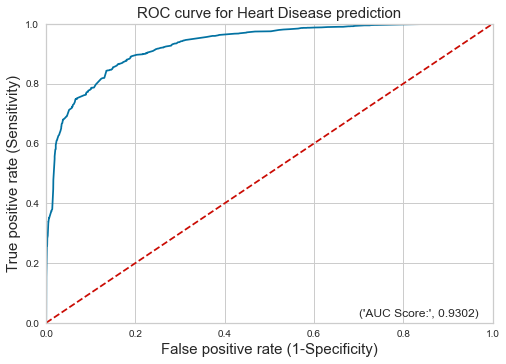

In [46]:
xgb_model = XGBClassifier(learning_rate =0.01,
n_estimators = 100,
max_depth = 3,
subsample =  0.8,
colsample_bytree = 1,
gamma = 1)

xgb_model.fit(X_train, Y_train)
y_pred_xbg = xgb_model.predict(X_test)

print("F1 SCORE: XG BOOST",f1_score(Y_test, y_pred_xbg))
print("Cohen Kappa: XG BOOST",cohen_kappa_score(Y_test, y_pred_xbg))
print("CR Report: XG BOOST \n",classification_report(Y_test, y_pred_xbg))
print("Confusion Matrix: XG BOOST \n",confusion_matrix(Y_test, y_pred_xbg))
print("MCC: XG BOOST",matthews_corrcoef(Y_test, y_pred_xbg))
print("Accuracy: XG BOOST",accuracy_score(Y_test, y_pred_xbg))
print("Balanced Accuracy: XG BOOST",balanced_accuracy_score(Y_test, y_pred_xbg))
plot_roc(xgb_model)

# CAT BOOST

F1 SCORE: CAT BOOST 0.8710843373493976
Cohen Kappa: CAT BOOST 0.7711447906524099
CR Report: CAT BOOST 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      3179
           1       0.88      0.86      0.87      2522

    accuracy                           0.89      5701
   macro avg       0.89      0.88      0.89      5701
weighted avg       0.89      0.89      0.89      5701

Confusion Matrix: CAT BOOST 
 [[2890  289]
 [ 353 2169]]
MCC: CAT BOOST 0.7713455551909825
Accuracy: CAT BOOST 0.887388177512717
Balanced Accuracy: CAT BOOST 0.8845613149736862


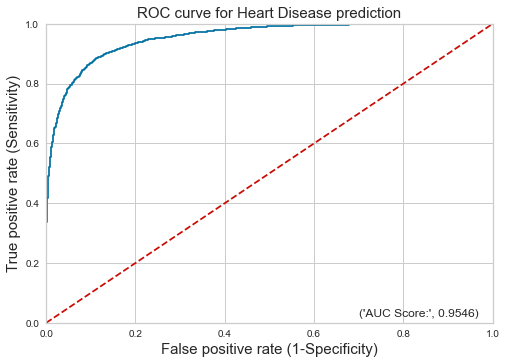

In [47]:
cat_model = CatBoostClassifier(silent=True , one_hot_max_size=2,loss_function='Logloss',eval_metric='AUC',boosting_type='Ordered', random_seed=25)
cat_model.fit(X_train, Y_train)
y_pred_cat = cat_model.predict(X_test)

print("F1 SCORE: CAT BOOST",f1_score(Y_test, y_pred_cat))
print("Cohen Kappa: CAT BOOST",cohen_kappa_score(Y_test, y_pred_cat))
print("CR Report: CAT BOOST \n",classification_report(Y_test, y_pred_cat))
print("Confusion Matrix: CAT BOOST \n",confusion_matrix(Y_test, y_pred_cat))
print("MCC: CAT BOOST",matthews_corrcoef(Y_test, y_pred_cat))
print("Accuracy: CAT BOOST",accuracy_score(Y_test, y_pred_cat))
print("Balanced Accuracy: CAT BOOST",balanced_accuracy_score(Y_test, y_pred_cat))
plot_roc(cat_model)